In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

In [45]:
# stehende Mikrowellen
V1_1 = pd.read_csv('./19_Mikrowellen/V1_1.csv', sep = ',', skipinitialspace = True)

V1_1_x = V1_1['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_1_E = V1_1['E'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# Lecherleitung
V1_3 = pd.read_csv('./19_Mikrowellen/V1_3.csv', sep = ',', skipinitialspace = True)

V1_3_x = V1_3['pos'].str.strip(' ').drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)
V1_3_E = V1_3['E'].str.strip().drop(index = 0).dropna(axis = 'index').to_numpy().astype(float)


# curve_fit
def E1(x, E0, k, a):
    return 2*E0*abs(np.sin(k*x - a))

def E2(x, E0, k, a, m, b):
    return 2*E0*abs(np.sin(k*x - a))+m*x+b

In [46]:
# Bestimmung der Fitparameter
popt_1_1, pcov_1_1 = curve_fit(E1, V1_1_x, V1_1_E, bounds = ([4.1, 0., 0.], [6., 0.4, 100.]))
popt_1_3, pcov_1_3 = curve_fit(E2, V1_3_x, V1_3_E, bounds = ([0, 0., 0., -1, 0], [2, 0.4, 100., 1, 4]))

popt_1_1, popt_1_3, pcov_1_1, pcov_1_3

(array([ 4.1       ,  0.19836225, 49.83816106]),
 array([ 6.53402227e-01,  1.96740717e-01,  5.04265238e+01, -1.04749581e-02,
         2.87045368e+00]),
 array([[1.28233794e-02, 2.09905968e-06, 4.21904281e-05],
        [2.09905968e-06, 1.02505582e-06, 1.14568766e-04],
        [4.21904281e-05, 1.14568766e-04, 1.36082004e-02]]),
 array([[ 3.48415972e-03, -1.47249599e-06,  1.86287774e-04,
         -1.16251761e-06, -4.32598206e-03],
        [-1.47249599e-06,  2.83784242e-07,  3.46932928e-05,
          9.29383097e-09,  1.22857703e-06],
        [ 1.86287774e-04,  3.46932928e-05,  5.77477948e-03,
          5.54463884e-07, -3.31203784e-04],
        [-1.16251761e-06,  9.29383097e-09,  5.54463884e-07,
          2.40442460e-07, -2.85216750e-05],
        [-4.32598206e-03,  1.22857703e-06, -3.31203784e-04,
         -2.85216750e-05,  1.03853333e-02]]))

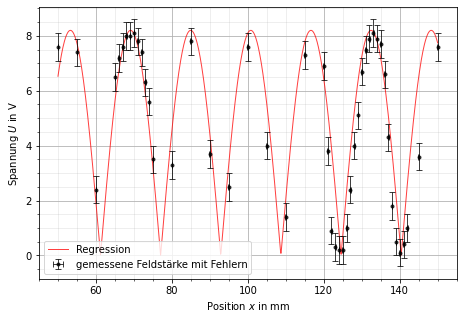

In [47]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_1 = np.linspace(min(V1_1_x), max(V1_1_x), 1000)
#print(E(xplot_1_1, *popt_1_1))

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Spannung $U$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_1, E1(xplot_1_1, *popt_1_1), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_1_x, V1_1_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="lower left")
plt.savefig('./19_Mikrowellen/V1_1.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

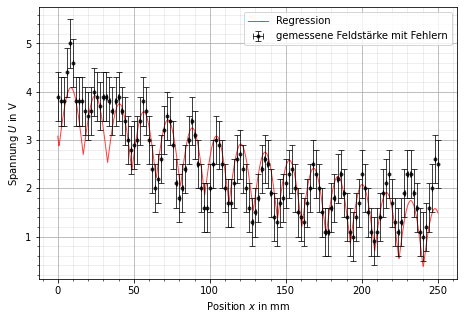

In [48]:
fig, ax = plt.subplots(figsize=(7.5,5))

xplot_1_3 = np.linspace(min(V1_3_x), max(V1_3_x), 1000)

#ax.set_title(r'Korrigierte Steigungen $mr^2$ für variierte Kugelradien')  
ax.set_xlabel(r'Position $x$ in mm')
ax.set_ylabel(r'Spannung $U$ in V')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1_3, E2(xplot_1_3, *popt_1_3), color = 'red', alpha = 0.75, linewidth = 1, label = 'Regression')
ax.errorbar(V1_3_x, V1_3_E, xerr = 0.1, yerr = 0.5, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = 'gemessene Feldstärke mit Fehlern')
ax.legend()
ax.legend(loc="upper right")
plt.savefig('./19_Mikrowellen/V1_3.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()